In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import pandas as pd
import csv
import os


api_url = "https://data.cdc.gov/api/views/e6fc-ccez/rows.json?accessType=DOWNLOAD"

print(requests.get(api_url).json)

<bound method Response.json of <Response [200]>>


In [3]:
# what does json look like?

response = requests.get(api_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "data": [
        [
            "row-fzgy~66am.bven",
            "00000000-0000-0000-34AF-0AEA1F128F1C",
            0,
            1449081936,
            null,
            1449081936,
            null,
            "{ }",
            "1909",
            "2718000",
            "126.8",
            "30"
        ],
        [
            "row-eins_bbxp.j5u8",
            "00000000-0000-0000-EFF0-C8104A0BD213",
            0,
            1449081936,
            null,
            1449081936,
            null,
            "{ }",
            "1910",
            "2777000",
            "126.8",
            "30.1"
        ],
        [
            "row-gpqm~emws~z2m3",
            "00000000-0000-0000-F490-0A210D4020A9",
            0,
            1449081936,
            null,
            1449081936,
            null,
            "{ }",
            "1911",
            "2809000",
            "126.3",
            "29.9"
        ],
        [
            "row-jdz8.jbei-d95p",
            "00000

In [4]:
# what does a data frame look like?

csv_url = "https://data.cdc.gov/api/views/e6fc-ccez/rows.csv?accessType=DOWNLOAD"

birth_df = pd.read_csv(csv_url, encoding="utf-8")

birth_df.head()

,Year,Birth Number,General Fertility Rate,Crude Birth Rate
0,1909,2718000,126.8,30.0
1,1910,2777000,126.8,30.1
2,1911,2809000,126.3,29.9
3,1912,2840000,125.8,29.8
4,1913,2869000,124.7,29.5


In [5]:
# get rid of 'Crude Birth Rate' column cuz we don't need it

del birth_df['Crude Birth Rate']


In [6]:
# converting birth numbers and fertility rates to numbers

birth_df['Birth Number'] = pd.to_numeric(birth_df['Birth Number'])
birth_df['General Fertility Rate'] = pd.to_numeric(birth_df['General Fertility Rate'])
birth_df['Year'] = pd.to_numeric(birth_df['Year'])

<IPython.core.display.Javascript object>


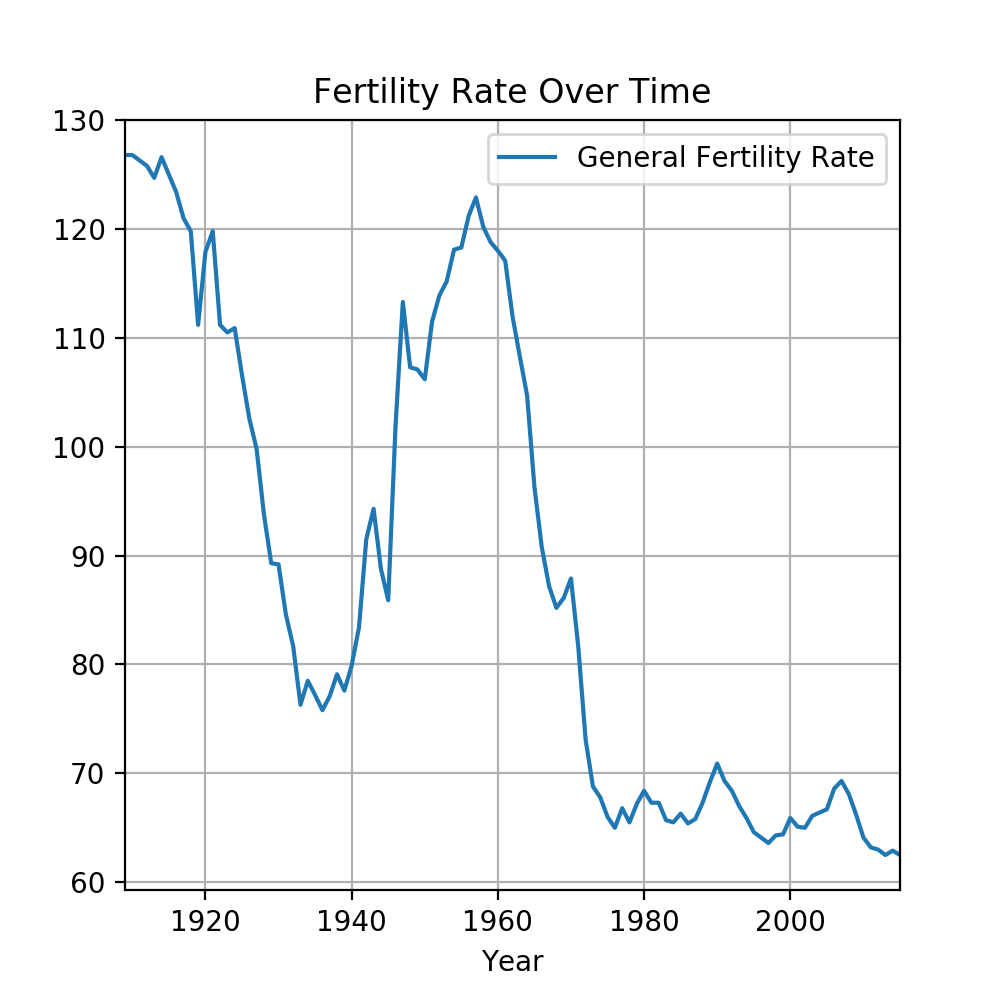

In [7]:
# let's make a chart

birth_df.plot(kind="line", x="Year", y="General Fertility Rate", grid=True, figsize=(5,5),
              title="Fertility Rate Over Time")
plt.show()

In [8]:
# we only have stock data from the year 2000 - so let's make birth rate data just show that time frame

indexNames = birth_df[ (birth_df['Year'] >= 1909) & (birth_df['Year'] <= 1999) ].index
birth_df.drop(indexNames , inplace=True)

birth_df.head()

,Year,Birth Number,General Fertility Rate
91,2000,4058814,65.9
92,2001,4025933,65.1
93,2002,4021726,65.0
94,2003,4089950,66.1
95,2004,4112052,66.4


<IPython.core.display.Javascript object>


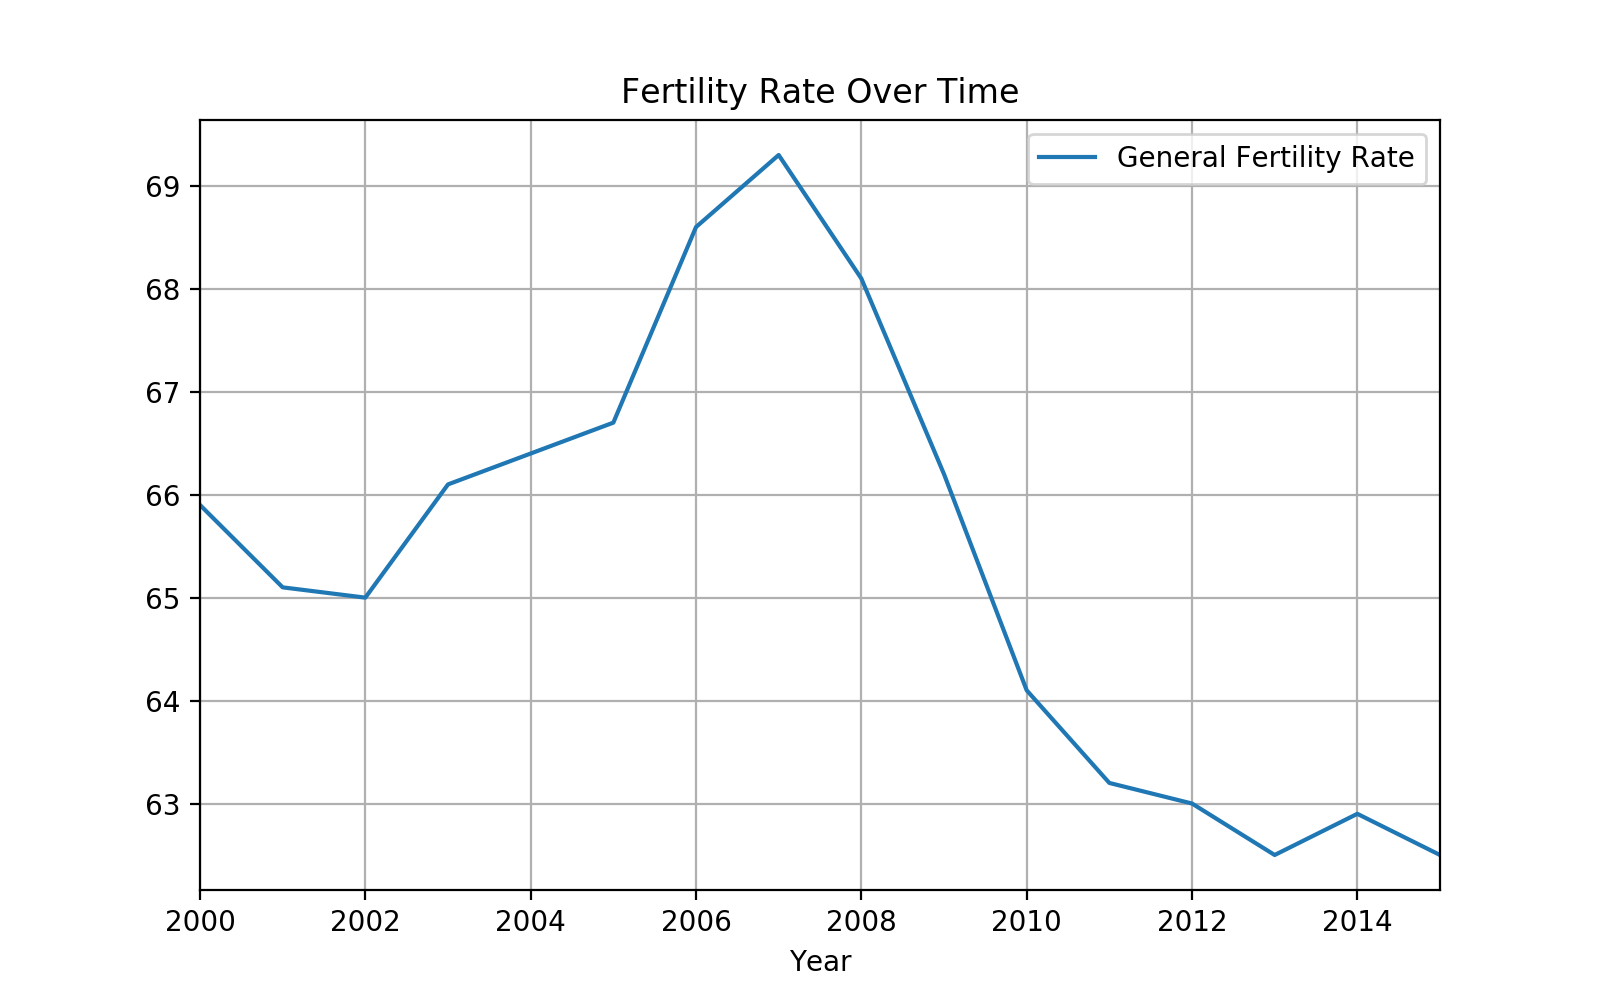

In [9]:
# much better, now let's look at that chart again

birth_df.plot(kind="line", x="Year", y="General Fertility Rate", grid=True, figsize=(8,5),
              title="Fertility Rate Over Time")
plt.show()

<IPython.core.display.Javascript object>


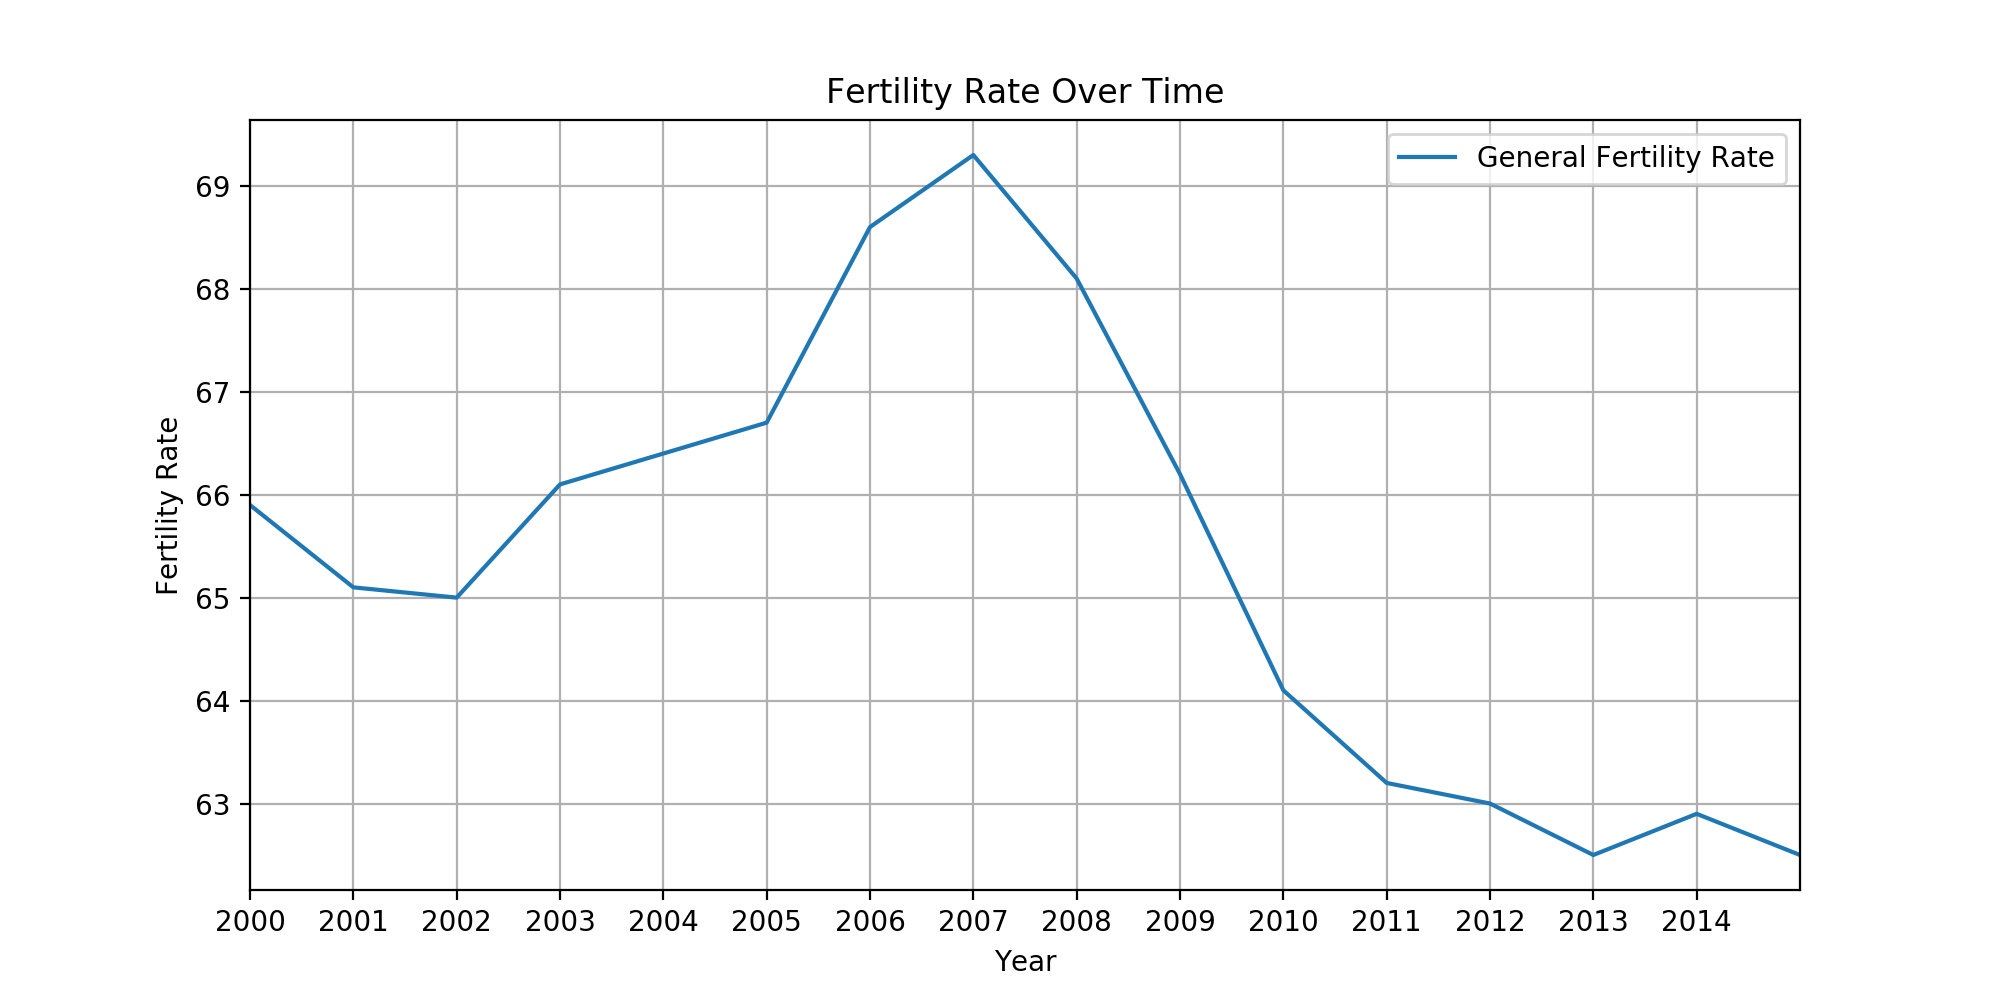

([<matplotlib.axis.XTick at 0x1230d2d10>,
 <a list of 15 Text xticklabel objects>)

In [24]:
# now let's clean it up and make it pretty

birth_df.plot(kind="line", x="Year", y="General Fertility Rate", grid=True, figsize=(10,5),
              title="Fertility Rate Over Time")

#x = np.arange(2000,2015,1)

#fig = plt.figure()
#plt.plot(birth_df)
#fig.suptitle('test title')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
#fig.savefig('test.jpg')
plt.xticks(np.arange(2000, 2015, step=1))